<h3 align="center">Marvel Movie Recommendation System - Python</h3> 

##### Overview: Have you ever wondered how popular streaming services like Netflix or Disney Plus provides movie recommendations? This Jupyter Notebook will show you how to create a simple and effective movie recommendation system based on the Marvel Cinematic Universe (MSU). This movie recommendation system is intended for new Marvel viewers and I will demonstrate how to create a movie recommentation system in a data analytics perspective using Pandas and a data science perspective using a model.

##### Use Case: The user enters a value based on the questions asked and the recommendation system will provide a list of Marvel movies for the user to watch.

##### Data Analytics Perspective: The timeline of Marvel movies in chronological order, Marvel movies based on a specific cast member, phase number, movie plot, super hero, and best Marvel movies based on customer rating.

##### Data Science Perspective: The top 10 Marvel movie recommendations based on a specific Marvel Movie

##### Tools: The primary tools used in this project are Jupyter Notebook, Visual Studio Code, Python, Pandas, Sklearn.

##### Dataset Source: https://www.kaggle.com/datasets/akashdeepkuila/automobile-customer. Note: For this demonstration, I will be adding a new column for Annual Income ($), transform the Spending Score into integers from 1-100, and remove a few columns to clean up the dataset.

##### Import all the necessary libaries

In [1472]:
import pandas as pd
import s3fs
import datetime
from datetime import date
import numpy as np
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [1473]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [1474]:
from pandasql import sqldf

##### First, I will connect to my public AWS S3 bucket and convert the stored file into a Pandas dataframe. Note: I am using public access for this example only but it is recommend to keep your S3 bucket private

In [1475]:
import pandas as pd
import s3fs

aws_file = pd.read_csv('https://tims-personal-projects.s3.amazonaws.com/Marvel_Movie_Recommendations.csv', encoding= 'unicode_escape')

marvel_movie_df = pd.DataFrame(aws_file)

display(marvel_movie_df.head())

,Id,Title,Genres,Release Date,Director,ScreenWriter,Producer,Cast,Plot,Language,Filming Locations,Status,Movie Rating,Review Rating,Movie Run Time,Budget,Box office
0,1,Captain Marvel,"Action, Adventure, Sci-Fi",8/3/2019,Anna Boden and Ryan Fleck,Anna Boden & Ryan Fleck & Geneva Robertson-Dworet,Kevin Feige,"Brie Larson, Samuel L. Jackson, Ben Mendelsohn...",Carol Danvers becomes one of the universe's mo...,English,"Los Angeles, California, USA",Released,PG-13,7.1,123 min,175000000.0,1.126318e+09
1,2,Captain America: The Winter Soldier,"Action, Adventure, Sci-Fi, Thriller",4/4/2014,Anthony and Joe Russo,James Gunn and Nicole Perlman,Kevin Feige,"Chris Evans, Samuel L. Jackson, Scarlett Johan...",As Steve Rogers struggles to embrace his role ...,"English, French","Los Angeles, California, USA",Released,PG-13,7.8,136 min,170000000.0,7.147666e+08
2,3,Iron Man 2,"Action, Adventure, Sci-Fi",7/5/2010,Jon Favreau,Justin Theroux,Kevin Feige,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt...",With the world now aware of his identity as Ir...,"English, French, Russian","D.C. Stages, 1360 East 6th Street, Downtown, L...",Released,PG-13,7.0,124 min,200000000.0,6.239333e+08
3,4,Ant-Man and the Wasp: Quantumania,"Action, Adventure, Comedy, Mystery, Sci-Fi, Th...",12/12/2022,Peyton Reed,Jeff Loveness,Kevin Feige,"Kathryn Newton, Evangeline Lilly, Paul Rudd",The further adventures of Ant Man and the Wasp.,English,NaN,Pre-production,PG-13,NaN,NaN,NaN,NaN
4,5,The Incredible Hulk,"Action, Adventure, Sci-Fi",13-06-2008,Louis Leterrier,Zak Penn,"Avi Arad, Gale Anne Hurd and Kevin Feige","Edward Norton, Liv Tyler, Tim Roth, William Hurt","Bruce Banner, a scientist on the run from the ...","English, Portuguese, Spanish","Cherry Street Bridge, Toronto, Ontario, Canada",Released,PG-13,6.7,112 min,150000000.0,2.634276e+08


In [1476]:
# Remove all the unneeded columns
marvel_movie_df.drop(marvel_movie_df.columns[marvel_movie_df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

# Rename the columns
marvel_movie_df_updated = marvel_movie_df.rename(
    columns={'ScreenWriter': 'Screen Writer', 'Review Rating': 'Customer Satisfaction Score'})

# Convert Date column to a datetime data type
marvel_movie_df_updated['Release Date'] = pd.to_datetime(
    marvel_movie_df_updated['Release Date'])

# Remove trailing zeros from the date for 'YYYY-MM-DD' format
marvel_movie_df_updated['Release Date'] = pd.to_datetime(
    marvel_movie_df_updated['Release Date'].dt.floor('L'))

# Create a copy for a fresh new dataframe
marvel_movie_df_final = marvel_movie_df_updated.copy()

marvel_movie_df_final.index = pd.to_datetime(
    marvel_movie_df_final.index, format='%Y/%m/%d').strftime('%m-%d-%Y')

# Remove all the uneeded columns
marvel_movie_df_final_v2 = marvel_movie_df_final.drop(
    columns=['Id', 'Genres', 'Screen Writer', 'Producer', 'Language', 'Filming Locations', 'Status', 'Movie Rating', 'Movie Run Time', 'Budget', 'Box office'])

marvel_movie_df_final_v3 = marvel_movie_df_final_v2.reset_index(drop=True)

display(marvel_movie_df_final_v3.info())

# display(marvel_movie_df_final_v3.head(7))

marvel_movie_df_final_v4 = marvel_movie_df_final_v3.sort_values(by=['Release Date'])

marvel_movie_df_final_v4['Title'] = marvel_movie_df_final_v4['Title'].str.replace('-', ' ')

marvel_movie_df_final_v4['Year'] = pd.to_datetime(marvel_movie_df_final_v4['Release Date']).dt.year

display(marvel_movie_df_final_v4.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Title                        33 non-null     object        
 1   Release Date                 33 non-null     datetime64[ns]
 2   Director                     33 non-null     object        
 3   Cast                         33 non-null     object        
 4   Plot                         33 non-null     object        
 5   Customer Satisfaction Score  29 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.7+ KB


None

,Title,Release Date,Director,Cast,Plot,Customer Satisfaction Score,Year
11,Iron Man,2008-02-05,Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Terrence H...","After being held captive in an Afghan cave, bi...",7.9,2008
4,The Incredible Hulk,2008-06-13,Louis Leterrier,"Edward Norton, Liv Tyler, Tim Roth, William Hurt","Bruce Banner, a scientist on the run from the ...",6.7,2008
2,Iron Man 2,2010-07-05,Jon Favreau,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt...",With the world now aware of his identity as Ir...,7.0,2010
13,Thor,2011-06-05,Kenneth Branagh,"Chris Hemsworth, Anthony Hopkins, Natalie Port...",The powerful but arrogant god Thor (Chris Hems...,7.0,2011
17,Captain America: The First Avenger,2011-07-22,Joe Johnston,"Chris Evans, Hugo Weaving, Samuel L. Jackson, ...","Steve Rogers, a rejected military soldier tran...",6.9,2011


In [1477]:
def add_phase(marvel_movie_df_final_v4):
    if (marvel_movie_df_final_v4['Year'] == 2008):
        return 'Phase 1'
    if (marvel_movie_df_final_v4['Year'] == 2009):
        return 'Phase 1'
    if (marvel_movie_df_final_v4['Year'] == 2010):
        return 'Phase 1'
    if (marvel_movie_df_final_v4['Year'] == 2011):
        return 'Phase 1'
    if (marvel_movie_df_final_v4['Year'] == 2012):
        return 'Phase 1'
    if (marvel_movie_df_final_v4['Year'] == 2013):
        return 'Phase 2'
    if (marvel_movie_df_final_v4['Year'] == 2014):
        return 'Phase 2'
    if (marvel_movie_df_final_v4['Year'] == 2015):
        return 'Phase 2'
    if (marvel_movie_df_final_v4['Year'] == 2016):
        return 'Phase 3'
    if (marvel_movie_df_final_v4['Year'] == 2017):
        return 'Phase 3'
    if (marvel_movie_df_final_v4['Year'] == 2018):
        return 'Phase 3'
    if (marvel_movie_df_final_v4['Year'] == 2019):
        return 'Phase 3'
    if (marvel_movie_df_final_v4['Year'] == 2020):
        return 'Phase 4'
    if (marvel_movie_df_final_v4['Year'] == 2021):
        return 'Phase 4'
    if (marvel_movie_df_final_v4['Year'] == 2022):
        return 'Phase 4'
    if (marvel_movie_df_final_v4['Year'] == 2023):
        return 'Phase 4'
  

In [1478]:
marvel_movie_df_final_v4['Phase Number'] = marvel_movie_df_final_v4.apply(add_phase, axis = 1)

marvel_movie_df_final_v5 = marvel_movie_df_final_v4.copy()

display(marvel_movie_df_final_v5.head())

,Title,Release Date,Director,Cast,Plot,Customer Satisfaction Score,Year,Phase Number
11,Iron Man,2008-02-05,Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Terrence H...","After being held captive in an Afghan cave, bi...",7.9,2008,Phase 1
4,The Incredible Hulk,2008-06-13,Louis Leterrier,"Edward Norton, Liv Tyler, Tim Roth, William Hurt","Bruce Banner, a scientist on the run from the ...",6.7,2008,Phase 1
2,Iron Man 2,2010-07-05,Jon Favreau,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt...",With the world now aware of his identity as Ir...,7.0,2010,Phase 1
13,Thor,2011-06-05,Kenneth Branagh,"Chris Hemsworth, Anthony Hopkins, Natalie Port...",The powerful but arrogant god Thor (Chris Hems...,7.0,2011,Phase 1
17,Captain America: The First Avenger,2011-07-22,Joe Johnston,"Chris Evans, Hugo Weaving, Samuel L. Jackson, ...","Steve Rogers, a rejected military soldier tran...",6.9,2011,Phase 1


In [1479]:
marvel_timeline_df = marvel_movie_df_final_v5[['Title', 'Release Date']]

display(marvel_timeline_df)

,Title,Release Date
11,Iron Man,2008-02-05
4,The Incredible Hulk,2008-06-13
2,Iron Man 2,2010-07-05
13,Thor,2011-06-05
17,Captain America: The First Avenger,2011-07-22
24,The Avengers,2012-04-05
23,Iron Man 3,2013-03-05
18,Thor: The Dark World,2013-08-11
12,Guardians of the Galaxy,2014-01-08
1,Captain America: The Winter Soldier,2014-04-04


##### Marvel Cinematic Universe (MCU) Timeline: Marvel movies in order (2008-Present)

In [1480]:
dates = marvel_timeline_df['Release Date']

min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = marvel_timeline_df['Title']

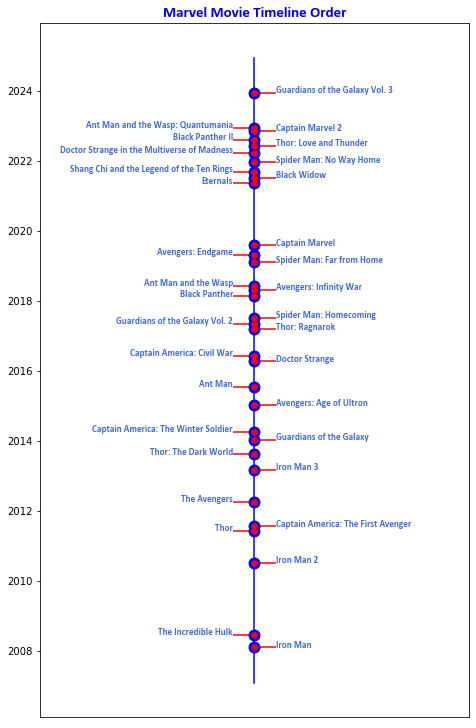

In [1481]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import numpy as np

fig, ax = plt.subplots(figsize=(6.5, 10), constrained_layout=True)
xlim = ax.set_xlim(-20, 20)
ylim = ax.set_ylim(min_date, max_date)
vline = ax.axvline(0, ymin=0.05, ymax=0.95, c='blue', zorder=1)

circle_border = ax.scatter(
    np.zeros(len(dates)), dates, s=120, c='blue', zorder=100)
circle_interior = ax.scatter(
    np.zeros(len(dates)), dates, s=30, c='red', zorder=100)

stems = np.zeros(len(dates))

label_offsets = np.repeat(2.0, len(dates))
label_offsets[1::2] = -2.0
for title, (l, d) in enumerate(zip(labels, dates)):
    delta = d - timedelta(days=90)
    align = 'right'
    if title % 2 == 0:
        align = 'left'
    text = ax.text(label_offsets[title], d, l, ha=align, fontfamily='Calibri',
                   fontweight='bold', color='royalblue', fontsize=9.2)

stems = np.repeat(2.0, len(dates))
stems[1::2] *= -1.0
x = ax.hlines(dates, 0, stems, color='red')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:

    # # hide tick labels
    remove_x_labels = ax.set_xticks([])

    set_title = ax.set_title('Marvel Movie Timeline Order', fontweight="bold", fontfamily='Calibri', fontsize=15,
                             color='Blue')


##### Here are the Top 10 highest rated Marvel movies overall. Avengers Endgame was definietly my favorite movie so I agree with this analysis. Shang-Chi and the Legend of the Ten Rings should be much higher though.

In [1482]:
marvel_movie_df_final_v4_sql_query = 'SELECT "Title", "Customer Satisfaction Score" FROM marvel_movie_df_final_v5 WHERE "Customer Satisfaction Score" <> "nan"'

_num_incoming_calls_monthly_phase_1_df = sqldf(
    marvel_movie_df_final_v4_sql_query)

_num_incoming_calls_monthly_phase_1_df_sorted = _num_incoming_calls_monthly_phase_1_df.sort_values(
    by='Customer Satisfaction Score', ascending=False)

df = _num_incoming_calls_monthly_phase_1_df_sorted.head(10).reset_index(drop=True)

df.style.background_gradient(cmap='RdBu')\
        .set_properties(**{'font-size': '15px'})


,Title,Customer Satisfaction Score
0,Avengers: Endgame,8.800000
1,Avengers: Infinity War,8.500000
2,Spider Man: No Way Home,8.300000
3,Guardians of the Galaxy,8.100000
4,The Avengers,8.100000
5,Iron Man,7.900000
6,Thor: Ragnarok,7.900000
7,Captain America: Civil War,7.800000
8,Captain America: The Winter Soldier,7.800000
9,Shang Chi and the Legend of the Ten Rings,7.700000


##### Here are the highest rated Marvel movies for Phase 1

In [1483]:
marvel_movie_df_final_v4_sql_query = 'SELECT "Title", "Phase Number", "Customer Satisfaction Score" FROM marvel_movie_df_final_v5 WHERE "Phase Number"="Phase 1" AND "Customer Satisfaction Score" <> "nan"'

_num_incoming_calls_monthly_phase_1_df = sqldf(
    marvel_movie_df_final_v4_sql_query)

_num_incoming_calls_monthly_phase_1_df_sorted = _num_incoming_calls_monthly_phase_1_df.sort_values(
    by='Customer Satisfaction Score', ascending=False)

df = _num_incoming_calls_monthly_phase_1_df_sorted.reset_index(drop=True)

df.style.background_gradient(cmap='RdBu')\
        .set_properties(**{'font-size': '15px'})


,Title,Phase Number,Customer Satisfaction Score
0,The Avengers,Phase 1,8.100000
1,Iron Man,Phase 1,7.900000
2,Iron Man 2,Phase 1,7.000000
3,Thor,Phase 1,7.000000
4,Captain America: The First Avenger,Phase 1,6.900000
5,The Incredible Hulk,Phase 1,6.700000


##### Here are the highest rated Marvel movies for Phase 2

In [1484]:
marvel_movie_df_final_v4_sql_query = 'SELECT "Title", "Phase Number", "Customer Satisfaction Score" FROM marvel_movie_df_final_v5 WHERE "Phase Number"="Phase 2" AND "Customer Satisfaction Score" <> "nan"'

_num_incoming_calls_monthly_phase_1_df = sqldf(
    marvel_movie_df_final_v4_sql_query)

_num_incoming_calls_monthly_phase_1_df_sorted = _num_incoming_calls_monthly_phase_1_df.sort_values(
    by='Customer Satisfaction Score', ascending=False)

df = _num_incoming_calls_monthly_phase_1_df_sorted.reset_index(drop=True)

df.style.background_gradient(cmap='RdBu')\
        .set_properties(**{'font-size': '15px'})


,Title,Phase Number,Customer Satisfaction Score
0,Guardians of the Galaxy,Phase 2,8.100000
1,Captain America: The Winter Soldier,Phase 2,7.800000
2,Avengers: Age of Ultron,Phase 2,7.300000
3,Ant Man,Phase 2,7.300000
4,Iron Man 3,Phase 2,7.200000
5,Thor: The Dark World,Phase 2,6.900000


##### Here are the highest rated Marvel movies for Phase 3

In [1485]:
marvel_movie_df_final_v4_sql_query = 'SELECT "Title", "Phase Number", "Customer Satisfaction Score" FROM marvel_movie_df_final_v5 WHERE "Phase Number"="Phase 3" AND "Customer Satisfaction Score" <> "nan"'

_num_incoming_calls_monthly_phase_1_df = sqldf(
    marvel_movie_df_final_v4_sql_query)

_num_incoming_calls_monthly_phase_1_df_sorted = _num_incoming_calls_monthly_phase_1_df.sort_values(
    by='Customer Satisfaction Score', ascending=False)

df = _num_incoming_calls_monthly_phase_1_df_sorted.reset_index(drop=True)

df.style.background_gradient(cmap='RdBu')\
        .set_properties(**{'font-size': '15px'})


,Title,Phase Number,Customer Satisfaction Score
0,Avengers: Endgame,Phase 3,8.800000
1,Avengers: Infinity War,Phase 3,8.500000
2,Thor: Ragnarok,Phase 3,7.900000
3,Captain America: Civil War,Phase 3,7.800000
4,Guardians of the Galaxy Vol. 2,Phase 3,7.700000
5,Doctor Strange,Phase 3,7.500000
6,Spider Man: Homecoming,Phase 3,7.500000
7,Spider Man: Far from Home,Phase 3,7.500000
8,Black Panther,Phase 3,7.300000
9,Ant Man and the Wasp,Phase 3,7.100000


##### Here are the highest rated Marvel movies for Phase 4

In [1486]:
marvel_movie_df_final_v4_sql_query = 'SELECT "Title", "Phase Number", "Customer Satisfaction Score" FROM marvel_movie_df_final_v5 WHERE "Phase Number"="Phase 4" AND "Customer Satisfaction Score" <> "nan"'

_num_incoming_calls_monthly_phase_1_df = sqldf(
    marvel_movie_df_final_v4_sql_query)

_num_incoming_calls_monthly_phase_1_df_sorted = _num_incoming_calls_monthly_phase_1_df.sort_values(
    by='Customer Satisfaction Score', ascending=False)

df = _num_incoming_calls_monthly_phase_1_df_sorted.reset_index(drop=True)

df.style.background_gradient(cmap='RdBu')\
        .set_properties(**{'font-size': '15px'})


,Title,Phase Number,Customer Satisfaction Score
0,Spider Man: No Way Home,Phase 4,8.300000
1,Shang Chi and the Legend of the Ten Rings,Phase 4,7.700000
2,Doctor Strange in the Multiverse of Madness,Phase 4,7.400000
3,Eternals,Phase 4,7.200000
4,Black Widow,Phase 4,7.000000
5,Thor: Love and Thunder,Phase 4,7.000000


##### Great! Since we analyzed the top rated Marvel movies per phase based on Customer Satisfaction, we can now recommend movies based on the user's preferences. For example, I want to mainly watch Marvel movies based on a specific cast member.

##### Recommendations based on a Cast Member:

##### For example, I only want to watch Marvel movies that had Robert Downey Jr. in order. 

##### Note: Please choose one at a time.

In [1487]:
filter_data = str(input('Please enter a single cast member to retrieve recommended movies: '))

filtered=(marvel_movie_df_final_v5.loc[marvel_movie_df_final_v5['Cast'].str.contains(filter_data, case=False)])

print("Here are the movies in order based on the cast member:" + " " + filter_data)
display(filtered[['Title', 'Phase Number']])

Here are the movies in order based on the cast member: Chris p


,Title,Phase Number
12,Guardians of the Galaxy,Phase 2
15,Guardians of the Galaxy Vol. 2,Phase 3
8,Avengers: Infinity War,Phase 3
5,Avengers: Endgame,Phase 3
16,Guardians of the Galaxy Vol. 3,Phase 4


##### Recommendations based on the phase number:

##### For example, I want to rewatch all the Marvel movies from Phase 3 to get ready to Phase 4.

In [1488]:
filter_data = str(input('Please enter the phase you want to watch: '))

filtered=(marvel_movie_df_final_v5.loc[marvel_movie_df_final_v5['Phase Number'].str.contains(filter_data, case=False)])

print("Here are the movies in order based on the phase number:" + " " + filter_data)
display(filtered[['Title', 'Phase Number']])

Here are the movies in order based on the phase number: 1


,Title,Phase Number
11,Iron Man,Phase 1
4,The Incredible Hulk,Phase 1
2,Iron Man 2,Phase 1
13,Thor,Phase 1
17,Captain America: The First Avenger,Phase 1
24,The Avengers,Phase 1


##### Recommendations based on the movie plot:

##### For example, I want to watch all the Marvel movies related to all six infinity stones. 

In [1489]:
filter_data = str(input('Please enter the plot you want to watch: '))

filtered=(marvel_movie_df_final_v5.loc[marvel_movie_df_final_v5['Plot'].str.contains(filter_data, case=False)])

print("Here are the movies in order based on the plot:" + " " + filter_data)
display(filtered[['Title', 'Phase Number']])

Here are the movies in order based on the plot: Avengers


,Title,Phase Number
31,Captain America: Civil War,Phase 3
8,Avengers: Infinity War,Phase 3
20,Spider Man: Far from Home,Phase 3
5,Avengers: Endgame,Phase 3
6,Doctor Strange in the Multiverse of Madness,Phase 4


##### Recommendations based on the superhero:

##### For example, I want to watch all of the Marvel movies related to Iron Man.

In [1506]:
filter_data = str(input('Please enter the superhero you want to watch: '))

filtered=(marvel_movie_df_final_v5.loc[marvel_movie_df_final_v5['Plot'].str.contains(filter_data, case=False)])

print("Here are the movies based on the superhero:" + " " + filter_data)
display(filtered[['Title', 'Phase Number']])

Here are the movies based on the superhero: shang chi


,Title,Phase Number
23,Iron Man 3,Phase 2
26,Shang Chi and the Legend of the Ten Rings,Phase 4


##### Great! We have finally created a Marvel movie recommendation system in a data analytics perspective. Now, let's create the same recommendation system in a data science perspective.

In [1501]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

marvel_movie_df_final_v5['Plot'] = marvel_movie_df_final_v5['Plot'].fillna('')
tfidf_matrix = tfidf.fit_transform(marvel_movie_df_final_v5['Plot'])

In [1502]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [1503]:
indices = pd.Series(marvel_movie_df_final_v5.index, index=marvel_movie_df_final_v5['Title'])

display(indices.head())

Title
Iron Man                              11
The Incredible Hulk                    4
Iron Man 2                             2
Thor                                  13
Captain America: The First Avenger    17
dtype: int64

In [1504]:
def get_recommendations(hero, cosine_sim):
    
    idx = indices[hero]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
        
    return display((marvel_movie_df_final_v5[['Title', 'Phase Number', 'Customer Satisfaction Score']].iloc[movie_indices]).sort_values(by=['Phase Number']))

In [1505]:
filter_data = str(input('Please enter the full movie title you want recommendations for: '))

filtered=(marvel_movie_df_final_v5.loc[marvel_movie_df_final_v5['Title'].str.contains(filter_data, case=False)])

print("Here are the top 10 movie recommendations based on the movie:" + " " + filter_data)
get_recommendations(hero=filter_data, cosine_sim=cosine_sim)

Here are the top 10 movie recommendations based on the movie: Shang Chi and the Legend of the Ten Rings


,Title,Phase Number,Customer Satisfaction Score
2,Iron Man 2,Phase 1,7.0
4,The Incredible Hulk,Phase 1,6.7
11,Iron Man,Phase 1,7.9
19,Avengers: Age of Ultron,Phase 2,7.3
5,Avengers: Endgame,Phase 3,8.8
8,Avengers: Infinity War,Phase 3,8.5
14,Spider Man: Homecoming,Phase 3,7.5
9,Doctor Strange,Phase 3,7.5
31,Captain America: Civil War,Phase 3,7.8
6,Doctor Strange in the Multiverse of Madness,Phase 4,7.4
